In [40]:
from __future__ import print_function, division
%run ../basics.ipynb

Populating the interactive namespace from numpy and matplotlib


Loading BokehJS ...

In [2]:
df = pd.read_csv('../data/learning_resources.csv')
display(df.head(2))
tags = pd.read_csv('../data/tags.csv')
display(tags.head(2))
df['tags'] = df['id'].apply(lambda x: (' '.join(tags[tags['id'] == x]['concept_tag'].values.tolist())).strip())
print(df.columns)
print(df.count()/len(df)*100)
df.head(2)

id                      title                                  subtitle  \
0  cs101  Intro to Computer Science  Build a Search Engine & a Social Network   
1  ud257                A/B Testing     Online Experiment Design and Analysis   

                                         description  \
0  In this introduction to computer programming c...   
1  This course will cover the design and analysis...   

                                   short_description  \
0  Learn key computer science concepts in this in...   
1  This course will cover the design and analysis...   

                                            syllabus  \
0  ###Lesson 1: How to Get Started\n\n- Interview...   
1  ### Lesson 1: Overview of A/B Testing\nThis le...   

                                                 url  \
0  https://www.udacity.com/course/intro-to-comput...   
1  https://www.udacity.com/course/ab-testing--ud2...   

                               slug    difficulty created   ...     available  \
0  intro-to-computer-science--cs101      beginner     NaN   ...           NaN   
1                 ab-testing--ud257  intermediate     NaN   ...           NaN   

  end_date typical_learning_time  rating price new language  format  \
0      NaN               3months     NaN  Free NaN       en    MOOC   
1      NaN               1months     NaN  Free NaN       en    MOOC   

                                             license    venue  
0  Creative Commons Attribution-NonCommercial- No...  Udacity  
1  Creative Commons Attribution-NonCommercial- No...  Udacity  

[2 rows x 22 columns]

id          shortname    concept_tag  \
0  ud257  ab-testing--ud257  video_lecture   
1  ud257  ab-testing--ud257       in_depth   

                                                 url  
0  https://www.udacity.com/course/ab-testing--ud2...  
1  https://www.udacity.com/course/ab-testing--ud2...

Index([u'id', u'title', u'subtitle', u'description', u'short_description',
       u'syllabus', u'url', u'slug', u'difficulty', u'created',
       u'date_modified', u'date_published', u'available', u'end_date',
       u'typical_learning_time', u'rating', u'price', u'new', u'language',
       u'format', u'license', u'venue', u'tags'],
      dtype='object')
id                       100.000000
title                     99.781659
subtitle                  25.545852
description               85.152838
short_description          3.711790
syllabus                  10.043668
url                      100.000000
slug                     100.000000
difficulty                24.235808
created                   44.978166
date_modified              0.000000
date_published            44.978166
available                 44.978166
end_date                   0.000000
typical_learning_time     44.104803
rating                    17.685590
price                     98.689956
new                        0.00

id                      title                                  subtitle  \
0  cs101  Intro to Computer Science  Build a Search Engine & a Social Network   
1  ud257                A/B Testing     Online Experiment Design and Analysis   

                                         description  \
0  In this introduction to computer programming c...   
1  This course will cover the design and analysis...   

                                   short_description  \
0  Learn key computer science concepts in this in...   
1  This course will cover the design and analysis...   

                                            syllabus  \
0  ###Lesson 1: How to Get Started\n\n- Interview...   
1  ### Lesson 1: Overview of A/B Testing\nThis le...   

                                                 url  \
0  https://www.udacity.com/course/intro-to-comput...   
1  https://www.udacity.com/course/ab-testing--ud2...   

                               slug    difficulty created  \
0  intro-to-computer-science--cs101      beginner     NaN   
1                 ab-testing--ud257  intermediate     NaN   

                         ...                          end_date  \
0                        ...                               NaN   
1                        ...                               NaN   

  typical_learning_time rating  price new language format  \
0               3months    NaN   Free NaN       en   MOOC   
1               1months    NaN   Free NaN       en   MOOC   

                                             license    venue  \
0  Creative Commons Attribution-NonCommercial- No...  Udacity   
1  Creative Commons Attribution-NonCommercial- No...  Udacity   

                                                tags  
0  video_lecture project overview computer_scienc...  
1  video_lecture in_depth project data_collection...  

[2 rows x 23 columns]

In [108]:
class NN(object):
    def __init__(self):
        self.nn = None
        self.scaler = None
        
    def build_nn(self, X, y):
        nmf = Input(shape=(X.shape[1],), dtype='float32', name='nmf')
        # dropout = Dropout(0.1)
        # WeightRegularizer(l1=0., l2=0.)
        d1 = Dense(500, activation='relu', W_regularizer=None)(nmf)
        d2 = Dense(500, activation='relu', W_regularizer=None)(d1)
        #d3 = Dense(500, activation='tanh')(d2)
        out = Dense(y.shape[1], activation='sigmoid')(d2)
        model = Model(nmf, out)
        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['mse'])
        print(model.summary())
        self.nn = model
        
    def fit(self, X, y, n_epoch=100, shuffle=True, batch_size=1, verbose=2, secondary_y=False, *args, **kwargs):
        self.scaler = StandardScaler()
        X = self.scaler.fit_transform(X)
        self.build_nn(X, y)
        Y_flatten = np.array(y).flatten()
        print('baseline mean mse:', mean_squared_error(Y_flatten, np.array([Y_flatten.mean()]*len(Y_flatten))))
        start = datetime.datetime.now()
        hist = self.nn.fit(X, y,
              batch_size=batch_size,
              shuffle=shuffle,
              nb_epoch=n_epoch, 
              verbose=verbose, **kwargs)
        print('nn training:', datetime.datetime.now() - start)
        if 'val_loss' in hist.history:
            data = zip(hist.history['loss'], hist.history['val_loss'])
            hist_df = pd.DataFrame(columns=['train', 'val'], data=data)
            hist_df.plot(y=['train', 'val'], secondary_y=['val'] if secondary_y else None)
            plt.show()
        else:
            data = hist.history['loss']
            hist_df = pd.DataFrame(columns=['train'], data=data)
            hist_df.plot(y=['train'])
            plt.show()
        
    def predict(self, X):
        X = self.scaler.transform(X)
        return self.nn.predict(X)

In [109]:
class CLF(object):
    def __init__(self, n_topics=20, tfidf_max_df=None, tfidf_min_df=None, tag_vec_max_df=None, tag_vec_min_df=None, 
                 ngram_range=None, nmf=True):
        self.n_topics = n_topics
        self.vectorizer = TfidfVectorizer(stop_words='english',
                                          max_df=0.5 if tfidf_max_df is None else tfidf_max_df,
                                          min_df=5 if tfidf_min_df is None else tfidf_min_df,
                                          ngram_range=(1 ,4) if ngram_range is None else ngram_range)
        
        self.tag_vectorizer = CountVectorizer(max_df=1. if tag_vec_max_df is None else tag_vec_max_df,
                                              min_df=0 if tag_vec_min_df is None else tag_vec_min_df)
        
        self.nmf = NMF(n_components=n_topics, random_state=2016) if nmf else None
        self.clf = None
        self.topic_dict = None

    def fit(self, X, y, viz=True, *args, **kwargs):
        orig_X = X.copy()
        X = self.prepare_X(X)
        X = self.vectorize_X(X, fit=True, viz=viz)
        if viz:
            try:
                tsne_plot(X, orig_X[[orig_X.columns[0]]], fit=True)
            except:
                print(traceback.format_exc())
        y = self.vectorize_y(y, fit=True)
        self.clf = NN()
        filt = np.array(y.sum(axis=1) > 0).flatten() # don't train on untagged resources
        if sum(filt) != y.shape[0]:
            print('excluding untagged resources for clf training')
            print(y.shape)
            print(filt.shape)
            print(y.shape[0], end=' -> ')
            y = y[filt, :]
            X = X[filt, :]
            print(y.shape[0])
        self.clf.fit(X, y, *args, **kwargs)
        
    def predict(self, X):
        X = self.prepare_X(X)
        X = self.vectorize_X(X, fit=False)
        return self.clf.predict(X)
    
    @staticmethod
    def prepare_X(X):
        if isinstance(X, pd.DataFrame):
            concat_x = pd.Series(index=X.index, data='')
            for i in X.columns:
                concat_x += ' ' + X[i].apply(text_cleanup)
            X = concat_x
        else:
            assert isinstance(X, pd.Series)
        return X
        
    def vectorize_X(self, X, fit=False, viz=False):
        if fit:
            tfidf = self.vectorizer.fit_transform(X.values)
        else:
            tfidf = self.vectorizer.transform(X.values)
        tfidf, words = filter_word_rep(tfidf, self.vectorizer.get_feature_names())
        print('tfidf shape', tfidf.shape)
        # tfidf = (tfidf > 0.).astype('float')
        
        if self.nmf is not None:
            if fit:
                nmf = self.nmf.fit_transform(tfidf)
                feature_names = words
                n_top_words = 50
                self.topic_dict = dict()
                for topic_idx, topic in enumerate(self.nmf.components_):
                    topic_top_words = [feature_names[i]
                                    for i in topic.argsort()[:-n_top_words - 1:-1]]
                    topic_top_words_vals = sorted(topic.ravel(), reverse=True)[:n_top_words]
                    text_freq = zip(topic_top_words, topic_top_words_vals)
                    if viz:
                        print("v v v v \tTopic #%d\t" % topic_idx, end='v v v v v')
                        wordcloud(text_freq)
                    topic_top_words = ", ".join(topic_top_words)
                    #print(topic_top_words)
                    self.topic_dict[topic_idx] = text_freq
                if viz:
                    viz_nmf_output(nmf)
            else:
                nmf = self.nmf.transform(tfidf)
            print('nmf shape:', nmf.shape)
            return nmf
        else:
            return tfidf.todense()
    
    def plot_word_and_tag_clouds(self, X, y, fit=False, th=0, viz=False):
        X = self.prepare_X(X)
        X = self.vectorize_X(X, fit=fit, viz=viz)
        y = self.vectorize_y(y, fit=fit)
        topic_tags = defaultdict(lambda: np.zeros(y.shape[1]))
        for x_s, y_s in tqdm(zip(X, y)):
            x_s = np.array(x_s).flatten()
            y_s = np.array(y_s).flatten()
            for i, x_i in enumerate(x_s):
                if x_i >= th:
                    topic_tags[i] += (x_i * y_s)
        topic_freq = {key: zip(self.get_tag_names(), val) for key, val in topic_tags.items()}
        for key, text_freq in self.topic_dict.items():
            print('-' * 80)
            wordcloud(text_freq)
            wordcloud(topic_freq[key])
    
    def vectorize_y(self, y, fit=False):
        if fit:
            y = y.fillna(' ')
            y = self.tag_vectorizer.fit_transform(y.values)
            if self.tag_vectorizer.stop_words_:
                print('ignored tags:')
                print(' ,'.join(self.tag_vectorizer.stop_words_))
            print('considered tags: (tag, resources tagged in %)')
            print(' ,'.join(map(str, sorted(zip(self.tag_vectorizer.get_feature_names(), 
                              np.array(y.sum(axis=0)).flatten()/y.shape[0]*100, 
                              np.array(y.sum(axis=0)).flatten()), key=itemgetter(1), reverse=True))))
        else:
            y = self.tag_vectorizer.transform(y.values)
        y = (y > 0).astype('float').todense()
        print('y shape', y.shape)
        return y
    
    def get_tag_names(self):
        return self.tag_vectorizer.get_feature_names()

# resources: 458
tagged resources: 356
tfidf shape (458, 2699)
nmf shape: (458, 50)
considered tags: (tag, resources tagged in %)
(u'mooc', 32.751091703056765, 150) ,(u'video_lecture', 32.532751091703055, 149) ,(u'machine_learning', 28.820960698689959, 132) ,(u'in_depth', 18.5589519650655, 85) ,(u'unsupervised_learning', 11.790393013100436, 54) ,(u'probability_statistics', 11.572052401746726, 53) ,(u'overview', 10.698689956331878, 49) ,(u'project', 9.8253275109170293, 45) ,(u'reinforcement_learning', 8.7336244541484707, 40) ,(u'business_analytics', 7.4235807860262017, 34) ,(u'neural_networks', 6.9868995633187767, 32) ,(u'data_visualization', 5.4585152838427948, 25) ,(u'big_data', 4.5851528384279483, 21) ,(u'python', 4.5851528384279483, 21) ,(u'data_collection', 3.4934497816593884, 16) ,(u'graph_analytics', 3.2751091703056767, 15) ,(u'project_focused', 3.2751091703056767, 15) ,(u'data_integration', 3.0567685589519651, 14) ,(u'case_study', 2.8384279475982535, 13) ,(u'hadoop', 2.620087336

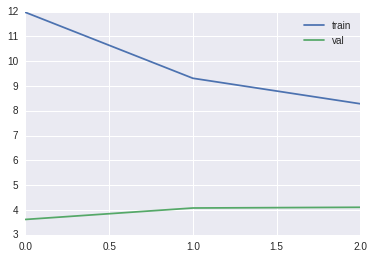

In [111]:
clf = CLF(n_topics=50, tag_vec_min_df=0, nmf=True)
print('# resources:', len(df))
print('tagged resources:', (df['tags'].apply(len) > 0).sum())
clf.fit(df[['title', 'subtitle', 'description', 'syllabus']], df['tags'], 
        viz=False, 
        n_epoch=3, 
        verbose=2, batch_size=1,
        validation_split=0.1)
#clf.plot_word_and_tag_clouds(df[['title', 'subtitle', 'description', 'syllabus']], df['tags'])

In [112]:
y_pred = clf.predict(df[['title', 'subtitle', 'description', 'syllabus']])

tfidf shape (458, 2699)
nmf shape: (458, 50)


In [113]:
pos_th = 0.5
neg_th = 0.1
tags_rec = False
tags_rev = False
recs = list()
revs = list()
y_pred = y_pred
y_true = clf.vectorize_y(df['tags'])
tags = np.array(clf.get_tag_names())

print(classification_report(y_true, y_pred > .5, target_names=tags))

for idx, title in enumerate(df['title']):
    y_pred_row = np.array(y_pred[idx, :]).flatten()
    y_true_row = np.array(y_true[idx, :]).flatten()
    recommended_tags = (y_pred_row >= pos_th) & (y_true_row < 0.5)
    recommended_tags = zip(tags[recommended_tags], y_pred_row[recommended_tags])
    
    revise_tags = (y_pred_row <= neg_th) & (y_true_row > 0.5)
    revise_tags = zip(tags[revise_tags], y_pred_row[revise_tags])
    
    if (len(recommended_tags) > 0 and tags_rec) or (len(revise_tags) > 0 and tags_rev):
        print(title)
        df_entry = df.iloc[idx]
        c_id, c_url = df_entry['id'], df_entry['url']
        print(c_id, c_url)
        if len(recommended_tags) > 0 and tags_rec:
            print('  recommended tags:')
            for i, p in sorted(recommended_tags, key=itemgetter(1), reverse=True):
                print('\t', i, '(%.2f' % (p * 100), '% )')
                recs.append((c_id, i, p * 100))
        if len(revise_tags) > 0 and tags_rev:
            print('  revise tags:')
            for i, p in sorted(revise_tags, key=itemgetter(1)):
                print('\t', i, '(%.2f' % ((1. - p) * 100), '% )')
                revs.append((c_id, i, (1. - p) * 100))
        print('-' * 80)

y shape (458, 75)
                               precision    recall  f1-score   support

      artificial_intelligence       1.00      0.29      0.44         7
    association_rule_learning       0.50      1.00      0.67         1
                     big_data       0.53      0.95      0.68        21
                      biology       1.00      0.67      0.80         3
           business_analytics       0.71      0.74      0.72        34
                   case_study       0.40      0.31      0.35        13
               classification       0.00      0.00      0.00         2
                   clustering       0.67      0.67      0.67         6
             computer_science       0.67      0.50      0.57         8
                data_cleaning       1.00      0.25      0.40         4
              data_collection       0.33      0.19      0.24        16
             data_integration       0.00      0.00      0.00        14
         data_science_process       0.88      0.78      0.

In [ ]:
rec_df = pd.DataFrame(columns=['id', 'tag', 'probability'], data=recs)
rec_df.to_csv('tag_recommendations.csv', encoding='utf-8', index=False, quoting=QUOTE_ALL)

In [ ]:
rev_df = pd.DataFrame(columns=['id', 'tag', 'probability'], data=revs)
rev_df.to_csv('tag_revision.csv', encoding='utf-8', index=False, quoting=QUOTE_ALL)

In [ ]:
pd.DataFrame((y_pred > 0.5).sum(axis=1)).plot(kind='hist', bins=20)

In [ ]:
pd.DataFrame((y_true > 0.5).sum(axis=1)).plot(kind='hist', bins=20)

  0%|          | 0/5 [00:00<?, ?it/s]

# resources: 458
tagged resources: 356
tfidf shape (386, 2393)
nmf shape: (386, 30)
ignored tags:
high_performance_computing ,information_retrieval ,programming_tool ,ensemble_learning ,engineering ,topic_model ,text_data ,education ,galaxy ,fmri ,gis ,dimensionality_reduction ,hadoop ,streaming_data ,biology ,time_series_data ,javascript ,supervised_learning ,social_sciences ,tabular_data ,mathematics ,spark ,data_cleaning ,relational_database ,linear_algebra ,association_rule_learning ,economics ,recommender_system ,optimization ,databases ,security ,physics
considered tags: (tag, resources tagged in %)
(u'machine_learning', 32.124352331606218, 124) ,(u'mooc', 20.207253886010363, 78) ,(u'video_lecture', 19.948186528497409, 77) ,(u'unsupervised_learning', 13.471502590673575, 52) ,(u'in_depth', 12.435233160621761, 48) ,(u'reinforcement_learning', 10.103626943005182, 39) ,(u'probability_statistics', 8.0310880829015545, 31) ,(u'neural_networks', 7.7720207253886011, 30) ,(u'overview', 5.6

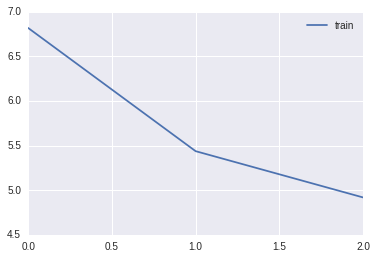

 20%|██        | 1/5 [00:13<00:54, 13.74s/it]

tfidf shape (72, 2393)
nmf shape: (72, 30)
y shape (72, 33)
tfidf shape (387, 2442)
nmf shape: (387, 30)
ignored tags:
nosql ,programming_tool ,graph_database ,data_science_process ,ensemble_learning ,engineering ,image_data ,education ,regression ,xml ,genetics ,classification ,dimensionality_reduction ,html ,mobile_devices ,mathematics ,clustering ,biology ,supervised_learning ,javascript ,time_series_data ,genomic_data ,social_sciences ,tabular_data ,streaming_data ,spark ,data_cleaning ,ethics ,relational_database ,association_rule_learning ,economics ,programming ,recommender_system ,optimization ,databases ,security ,history
considered tags: (tag, resources tagged in %)
(u'machine_learning', 31.524547803617569, 122) ,(u'mooc', 20.413436692506458, 79) ,(u'video_lecture', 20.413436692506458, 79) ,(u'unsupervised_learning', 13.695090439276486, 53) ,(u'in_depth', 11.111111111111111, 43) ,(u'reinforcement_learning', 10.335917312661499, 40) ,(u'probability_statistics', 8.52713178294573

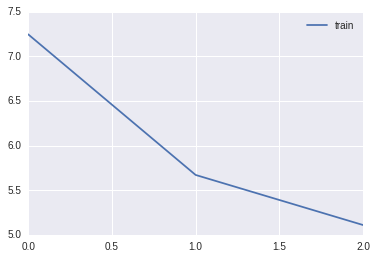

 40%|████      | 2/5 [00:26<00:40, 13.59s/it]

tfidf shape (71, 2442)
nmf shape: (71, 30)
y shape (71, 31)
tfidf shape (387, 2510)
nmf shape: (387, 30)
ignored tags:
classification ,graph_database ,ensemble_learning ,engineering ,topic_model ,image_data ,education ,ethics ,information_retrieval ,fmri ,gis ,nosql ,dimensionality_reduction ,html ,galaxy ,mobile_devices ,mathematics ,artificial_intelligence ,xml ,biology ,javascript ,time_series_data ,social_sciences ,tabular_data ,streaming_data ,spark ,data_cleaning ,linear_algebra ,economics ,recommender_system ,optimization ,security ,physics ,history
considered tags: (tag, resources tagged in %)
(u'mooc', 36.950904392764862, 143) ,(u'video_lecture', 36.692506459948319, 142) ,(u'machine_learning', 25.322997416020669, 98) ,(u'in_depth', 20.413436692506458, 79) ,(u'probability_statistics', 12.661498708010335, 49) ,(u'overview', 12.403100775193799, 48) ,(u'project', 11.369509043927648, 44) ,(u'unsupervised_learning', 9.5607235142118849, 37) ,(u'business_analytics', 8.2687338501292, 3

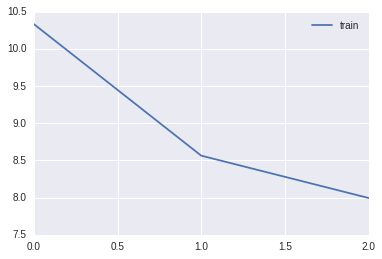

 60%|██████    | 3/5 [00:41<00:27, 13.93s/it]

tfidf shape (71, 2510)
nmf shape: (71, 30)
y shape (71, 38)
tfidf shape (387, 2503)
nmf shape: (387, 30)
ignored tags:
classification ,programming_tool ,graph_database ,ensemble_learning ,engineering ,topic_model ,image_data ,education ,ethics ,information_retrieval ,fmri ,gis ,nosql ,dimensionality_reduction ,supervised_learning ,html ,galaxy ,mobile_devices ,mathematics ,xml ,biology ,knowledge_representation ,javascript ,time_series_data ,streaming_data ,spark ,data_cleaning ,linear_algebra ,association_rule_learning ,economics ,recommender_system ,optimization ,physics ,history
considered tags: (tag, resources tagged in %)
(u'mooc', 38.759689922480625, 150) ,(u'video_lecture', 38.501291989664082, 149) ,(u'machine_learning', 23.772609819121445, 92) ,(u'in_depth', 21.963824289405682, 85) ,(u'probability_statistics', 12.919896640826872, 50) ,(u'overview', 12.661498708010335, 49) ,(u'project', 11.627906976744185, 45) ,(u'unsupervised_learning', 9.3023255813953494, 36) ,(u'business_anal

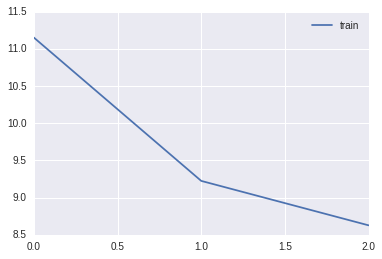

 80%|████████  | 4/5 [00:55<00:13, 13.96s/it]

tfidf shape (71, 2503)
nmf shape: (71, 30)
y shape (71, 40)
tfidf shape (387, 2500)
nmf shape: (387, 30)
ignored tags:
classification ,programming_tool ,graph_database ,ensemble_learning ,engineering ,topic_model ,image_data ,education ,ethics ,information_retrieval ,fmri ,gis ,nosql ,xml ,dimensionality_reduction ,html ,galaxy ,mobile_devices ,mathematics ,clustering ,biology ,supervised_learning ,javascript ,time_series_data ,social_sciences ,streaming_data ,spark ,data_cleaning ,linear_algebra ,association_rule_learning ,economics ,recommender_system ,optimization ,security ,physics ,history
considered tags: (tag, resources tagged in %)
(u'mooc', 38.759689922480625, 150) ,(u'video_lecture', 38.501291989664082, 149) ,(u'machine_learning', 23.772609819121445, 92) ,(u'in_depth', 21.963824289405682, 85) ,(u'overview', 12.661498708010335, 49) ,(u'probability_statistics', 12.661498708010335, 49) ,(u'project', 11.627906976744185, 45) ,(u'unsupervised_learning', 9.819121447028424, 38) ,(u'b

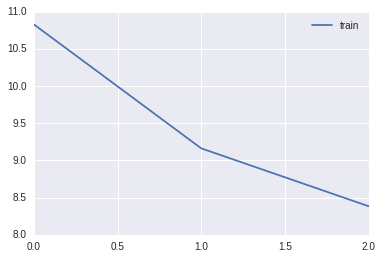

100%|██████████| 5/5 [01:09<00:00, 13.87s/it]

tfidf shape (71, 2500)
nmf shape: (71, 30)
y shape (71, 39)


In [114]:
#%run ../basics.ipynb
print('# resources:', len(df))
print('tagged resources:', (df['tags'].apply(len) > 0).sum())
tag_idx = df[df['tags'].apply(len) > 0].index
all_idx = set(df.index)
all_y_pred = list()
all_y_true = list()
tag_names = list()
n_folds = 5

for train_idx, test_idx in tqdm(KFold(len(tag_idx), n_folds=n_folds), total=n_folds):
    test_idx = tag_idx[test_idx]
    train_idx = list(all_idx - set(test_idx))
    train_df = df.loc[train_idx].copy()
    test_df = df.loc[test_idx].copy()
    clf = CLF(n_topics=30, tag_vec_min_df=5)
    clf.fit(train_df[['title', 'subtitle', 'description', 'syllabus']], 
            train_df['tags'], 
            viz=False, 
            n_epoch=3,
            verbose=0)
    y_pred = clf.predict(test_df[['title', 'subtitle', 'description', 'syllabus']])
    y_true = clf.vectorize_y(test_df['tags'])
    # print('hamming loss:', hamming_loss(y_true, y_pred))
    all_y_pred.append(y_pred)
    all_y_true.append(y_true)
    tag_names.append(clf.get_tag_names())

In [116]:
for pred_th in [0.25, 0.5, 0.75, 0.9]:
    all_tags = sorted(set([j for i in tag_names for j in i]))
    tmp_all_y_true = list()
    tmp_all_y_pred = list()
    for y_true, y_pred, t_names in zip(all_y_true, all_y_pred, tag_names):
        tmp_y_t = np.zeros((y_true.shape[0], len(all_tags)))
        tmp_y_p = np.zeros((y_pred.shape[0], len(all_tags)))
        sorting = np.array([all_tags.index(i) for i in t_names])
        tmp_y_t[:, sorting] = y_true
        tmp_y_p[:, sorting] = y_pred > pred_th
        tmp_all_y_true.extend([np.array(i).flatten() for i in tmp_y_t])
        tmp_all_y_pred.extend([np.array(i).flatten() for i in tmp_y_p])

    #print('res shape:', all_y_true.shape)
    print(classification_report(np.array(tmp_all_y_true), np.array(tmp_all_y_pred), target_names=all_tags))
    print('hamming loss:', hamming_loss(np.array(tmp_all_y_true), np.array(tmp_all_y_pred)))

                               precision    recall  f1-score   support

      artificial_intelligence       0.04      0.33      0.07         3
                     big_data       0.36      0.62      0.46        21
           business_analytics       0.52      0.79      0.63        34
                   case_study       0.13      0.15      0.14        13
                   clustering       0.25      1.00      0.40         1
             computer_science       0.00      0.00      0.00         8
              data_collection       0.17      0.19      0.18        16
             data_integration       0.11      0.21      0.15        14
         data_science_process       0.25      0.50      0.33         4
           data_visualization       0.14      0.28      0.18        25
                    databases       0.00      0.00      0.00         0
                     genetics       0.50      0.75      0.60         4
                 genomic_data       0.50      0.75      0.60         4
     

# resources: 458
tagged resources: 356
tfidf shape (458, 2426)
v v v v 	Topic #0	v v v v v

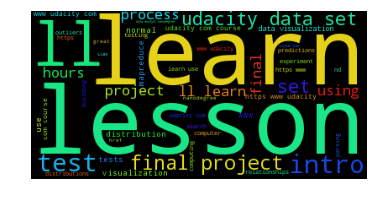

v v v v 	Topic #1	v v v v v

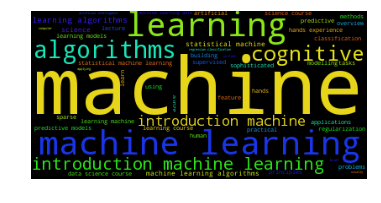

v v v v 	Topic #2	v v v v v

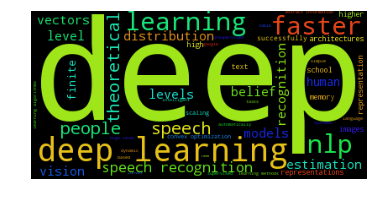

v v v v 	Topic #3	v v v v v

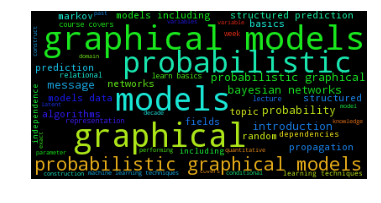

v v v v 	Topic #4	v v v v v

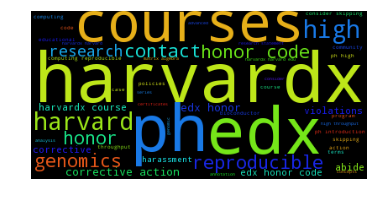

v v v v 	Topic #5	v v v v v

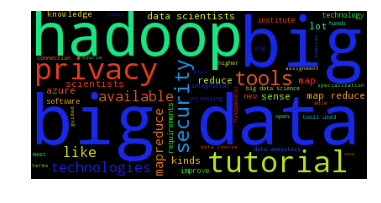

v v v v 	Topic #6	v v v v v

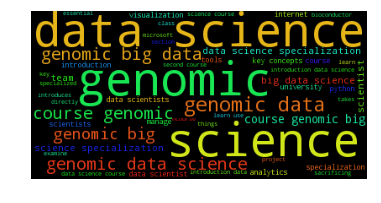

v v v v 	Topic #7	v v v v v

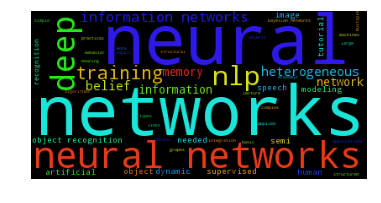

v v v v 	Topic #8	v v v v v

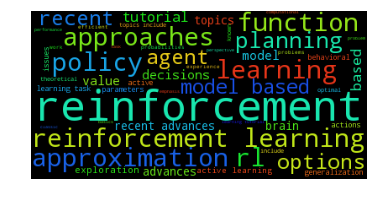

v v v v 	Topic #9	v v v v v

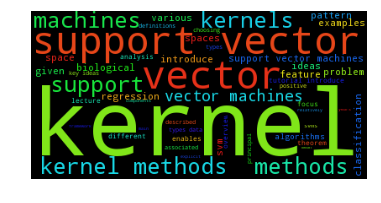

v v v v 	Topic #10	v v v v v

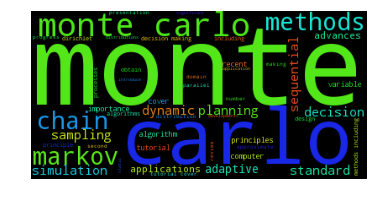

v v v v 	Topic #11	v v v v v

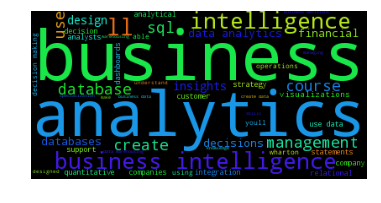

v v v v 	Topic #12	v v v v v

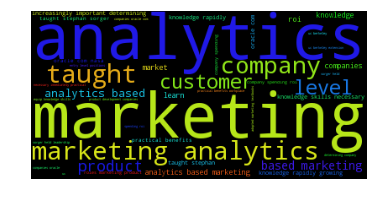

v v v v 	Topic #13	v v v v v

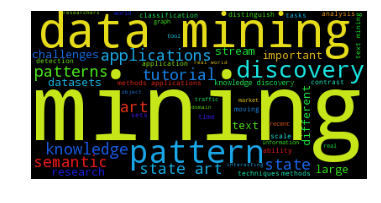

v v v v 	Topic #14	v v v v v

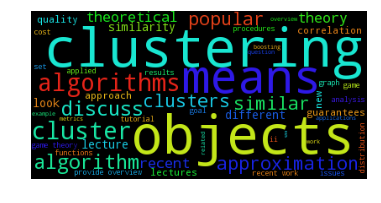

v v v v 	Topic #15	v v v v v

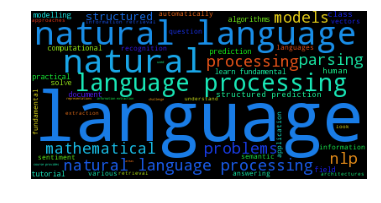

v v v v 	Topic #16	v v v v v

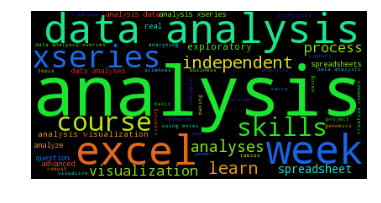

v v v v 	Topic #17	v v v v v

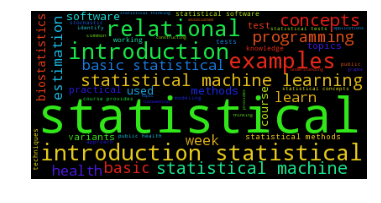

v v v v 	Topic #18	v v v v v

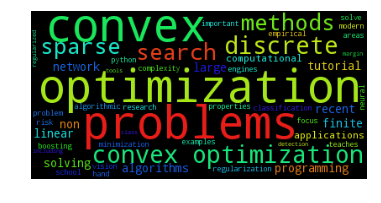

v v v v 	Topic #19	v v v v v

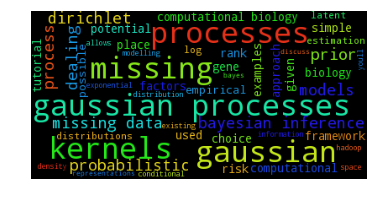

v v v v 	Topic #20	v v v v v

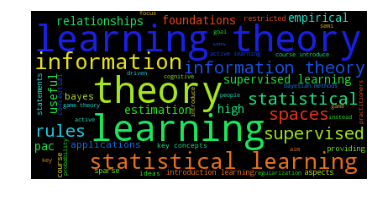

v v v v 	Topic #21	v v v v v

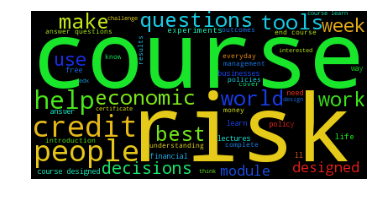

v v v v 	Topic #22	v v v v v

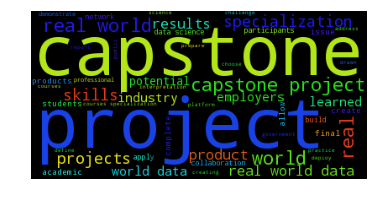

v v v v 	Topic #23	v v v v v

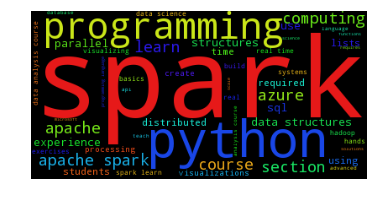

v v v v 	Topic #24	v v v v v

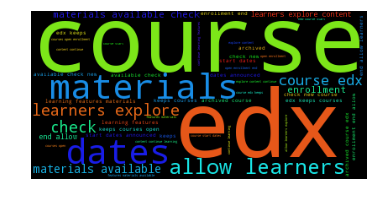

v v v v 	Topic #25	v v v v v

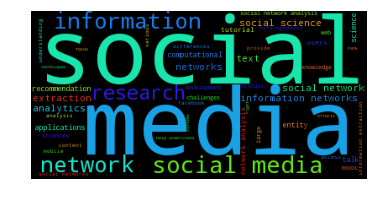

v v v v 	Topic #26	v v v v v

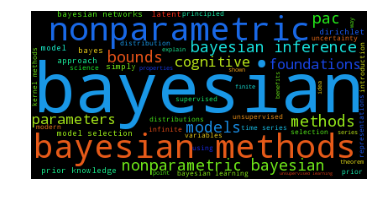

v v v v 	Topic #27	v v v v v

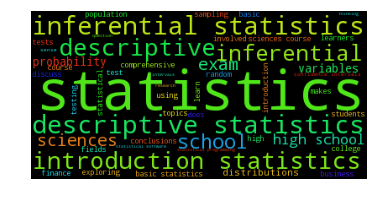

v v v v 	Topic #28	v v v v v

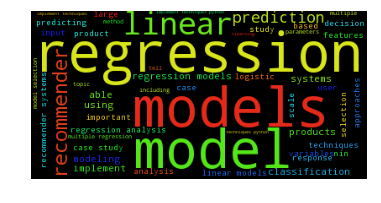

v v v v 	Topic #29	v v v v v

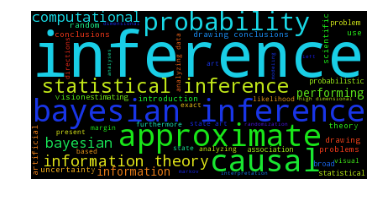

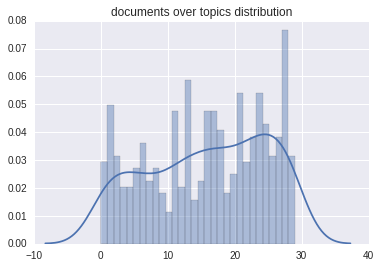

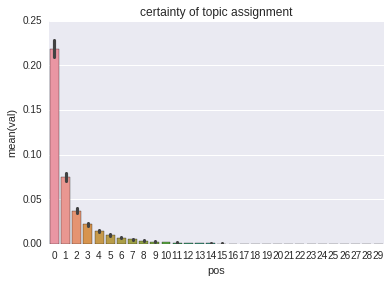

100%|██████████| 458/458 [00:00<00:00, 20401.78it/s]

nmf shape: (458, 30)
ignored tags:
mooc ,video_lecture
considered tags: (tag, resources tagged in %)
(u'machine_learning', 28.820960698689959, 132) ,(u'in_depth', 18.5589519650655, 85) ,(u'unsupervised_learning', 11.790393013100436, 54) ,(u'probability_statistics', 11.572052401746726, 53) ,(u'overview', 10.698689956331878, 49) ,(u'project', 9.8253275109170293, 45) ,(u'reinforcement_learning', 8.7336244541484707, 40) ,(u'business_analytics', 7.4235807860262017, 34) ,(u'neural_networks', 6.9868995633187767, 32) ,(u'data_visualization', 5.4585152838427948, 25) ,(u'big_data', 4.5851528384279483, 21) ,(u'python', 4.5851528384279483, 21) ,(u'data_collection', 3.4934497816593884, 16) ,(u'graph_analytics', 3.2751091703056767, 15) ,(u'project_focused', 3.2751091703056767, 15) ,(u'data_integration', 3.0567685589519651, 14) ,(u'case_study', 2.8384279475982535, 13) ,(u'hadoop', 2.6200873362445414, 12) ,(u'kernel_methods', 2.4017467248908297, 11) ,(u'healthcare', 2.1834061135371177, 10) ,(u'high_pe

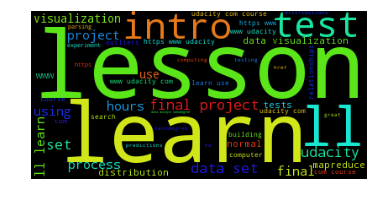

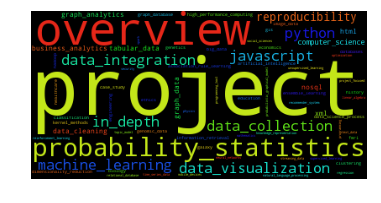

--------------------------------------------------------------------------------


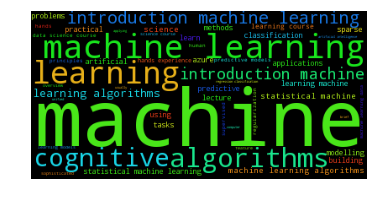

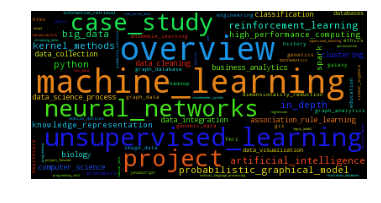

--------------------------------------------------------------------------------


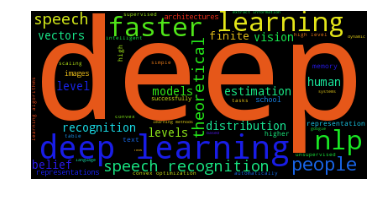

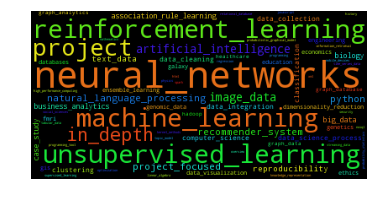

--------------------------------------------------------------------------------


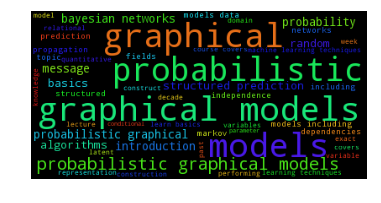

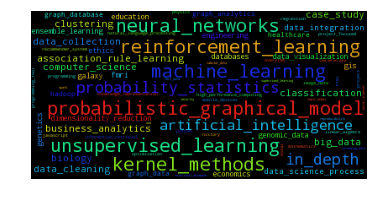

--------------------------------------------------------------------------------


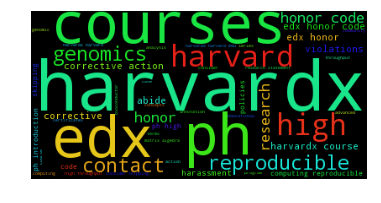

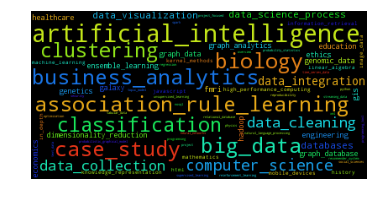

--------------------------------------------------------------------------------


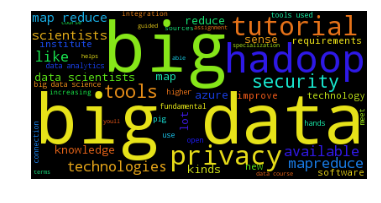

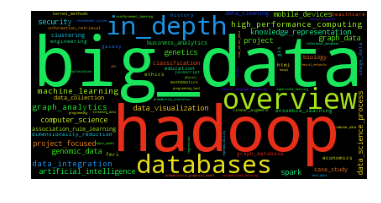

--------------------------------------------------------------------------------


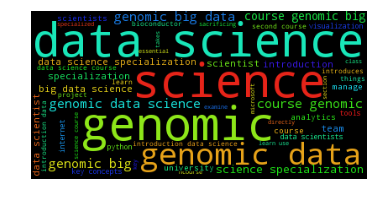

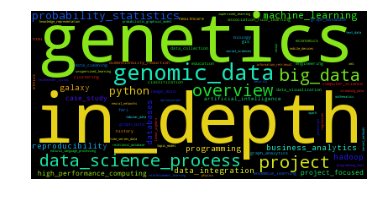

--------------------------------------------------------------------------------


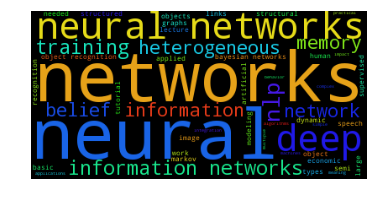

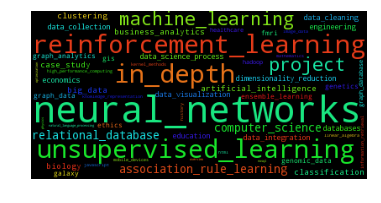

--------------------------------------------------------------------------------


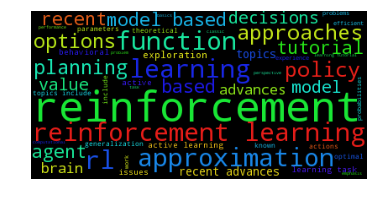

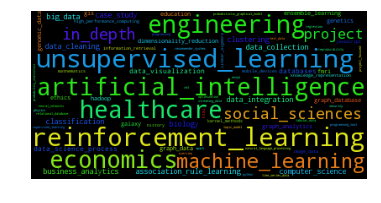

--------------------------------------------------------------------------------


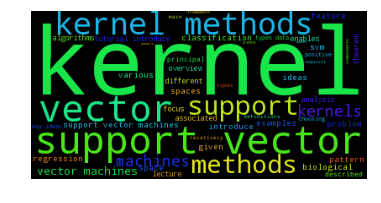

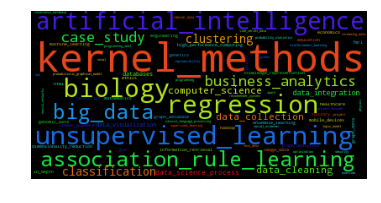

--------------------------------------------------------------------------------


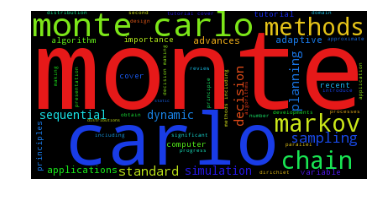

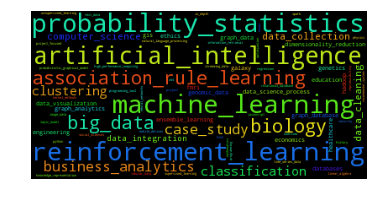

--------------------------------------------------------------------------------


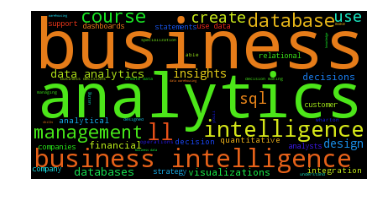

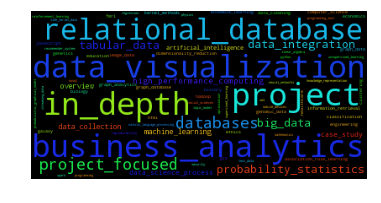

--------------------------------------------------------------------------------


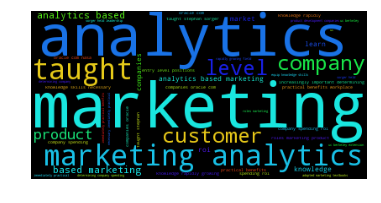

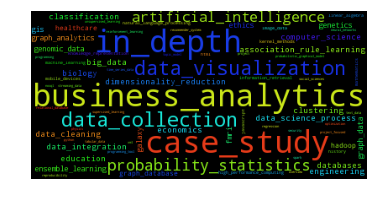

--------------------------------------------------------------------------------


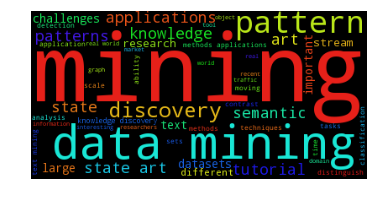

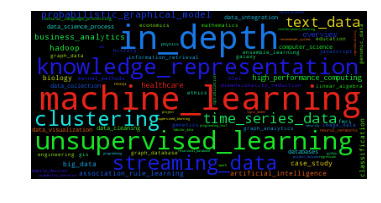

--------------------------------------------------------------------------------


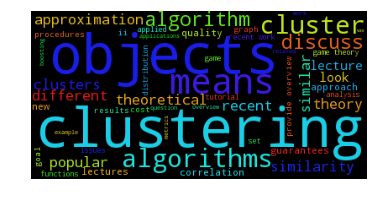

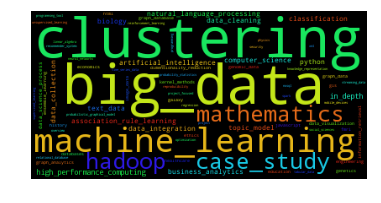

--------------------------------------------------------------------------------


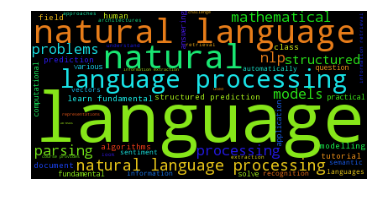

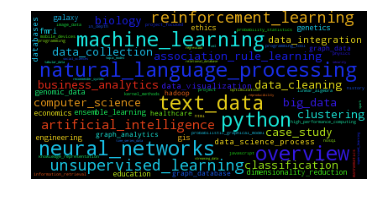

--------------------------------------------------------------------------------


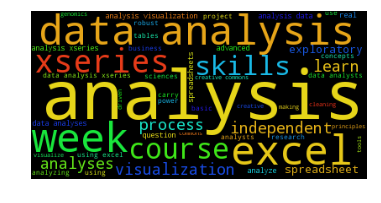

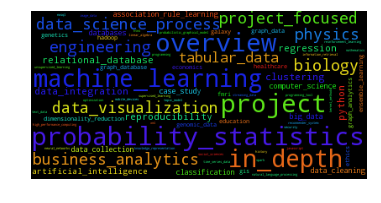

--------------------------------------------------------------------------------


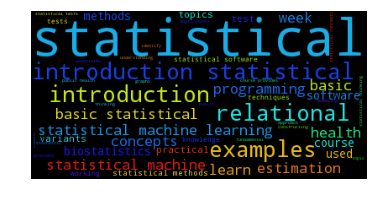

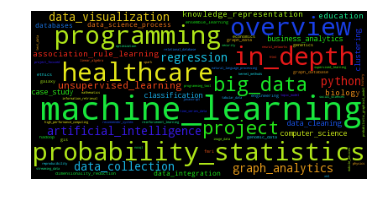

--------------------------------------------------------------------------------


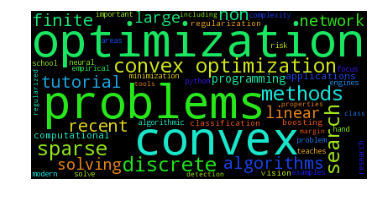

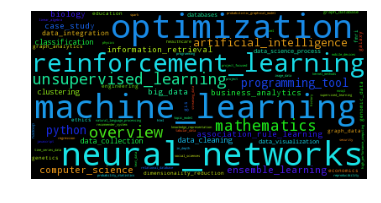

--------------------------------------------------------------------------------


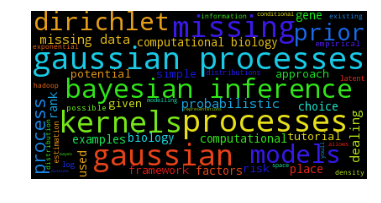

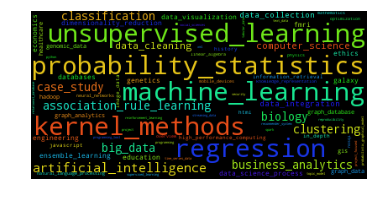

--------------------------------------------------------------------------------


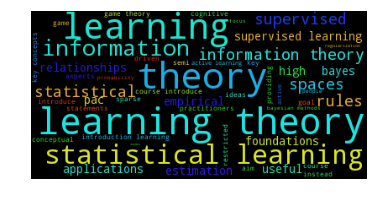

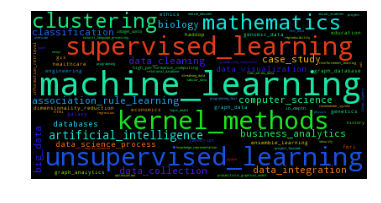

--------------------------------------------------------------------------------


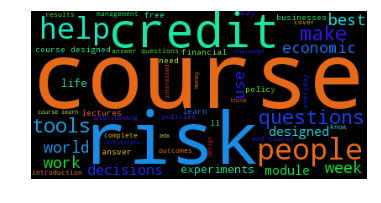

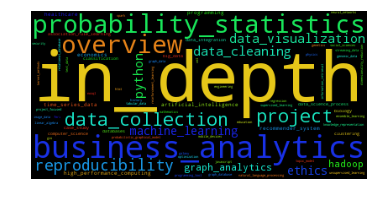

--------------------------------------------------------------------------------


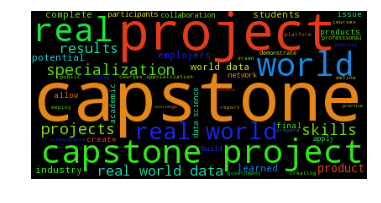

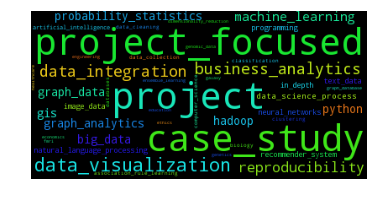

--------------------------------------------------------------------------------


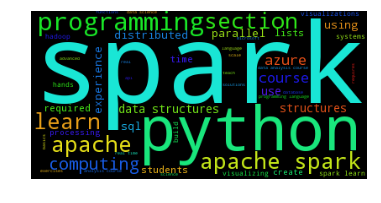

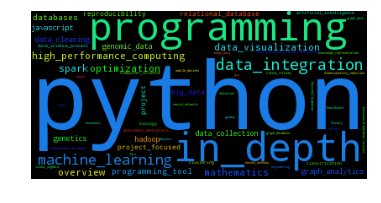

--------------------------------------------------------------------------------


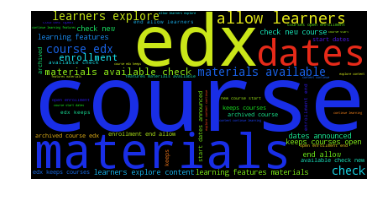

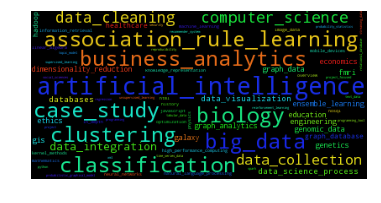

--------------------------------------------------------------------------------


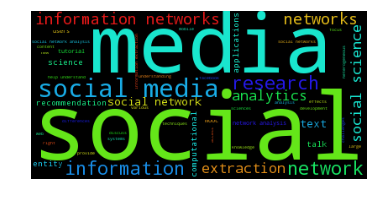

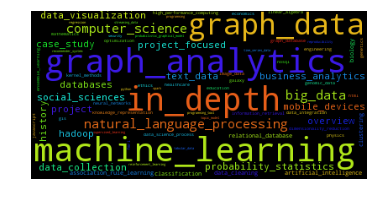

--------------------------------------------------------------------------------


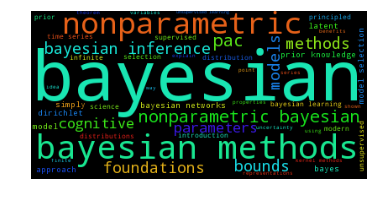

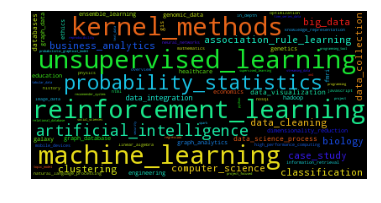

--------------------------------------------------------------------------------


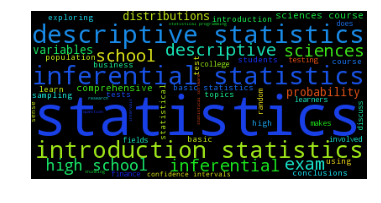

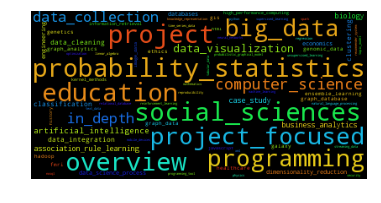

--------------------------------------------------------------------------------


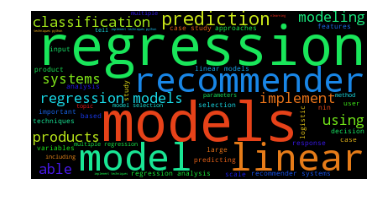

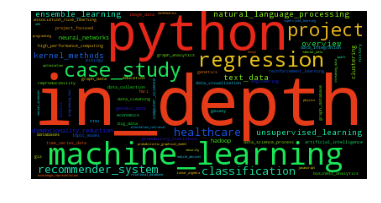

--------------------------------------------------------------------------------


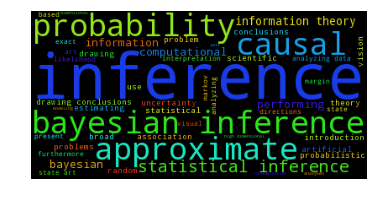

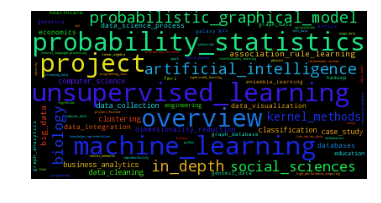

In [76]:
clf = CLF(n_topics=30, tag_vec_min_df=0)
print('# resources:', len(df))
print('tagged resources:', (df['tags'].apply(len) > 0).sum())
clf.plot_word_and_tag_clouds(df[['title', 'subtitle', 'description', 'syllabus']], df['tags'], fit=True, viz=True, th=0.1)